In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [18]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [20]:
data.columns = ['label', 'text']

In [21]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Separate features (X) and target labels (y)
X =  data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_test)


                                                   text
3245  Funny fact Nobody teaches volcanoes 2 erupt, t...
944   I sent my scores to sophas and i had to do sec...
1044  We know someone who you know that fancies you....
2484  Only if you promise your getting out as SOON a...
812   Congratulations ur awarded either å£500 of CD ...
...                                                 ...
3586  Our ride equally uneventful - not too many of ...
4686                                  Eatin my lunch...
4046  Thanks for your ringtone order, reference numb...
2836                            1's reach home call me.
4913  You've already got a flaky parent. It'snot sup...

[558 rows x 1 columns]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
vectorizer = CountVectorizer()

In [25]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
# Transform the test data (X_test)
new_message = ["Congratulations! You've won a free iPhone. Click here to claim now."]
X_test_vectorized = vectorizer.transform(X_test['text'])

In [26]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [27]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.99
Confusion Matrix:
[[489   2]
 [  4  63]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       491
        spam       0.97      0.94      0.95        67

    accuracy                           0.99       558
   macro avg       0.98      0.97      0.97       558
weighted avg       0.99      0.99      0.99       558



In [ ]:
new_message = input("Enter a message to classify (spam or ham): ")
new_message_vectorized = vectorizer.transform([new_message])
prediction = classifier.predict(new_message_vectorized)
print(f"\nThe predicted label for your message is: {prediction[0]}")


The predicted label for your message is: ham


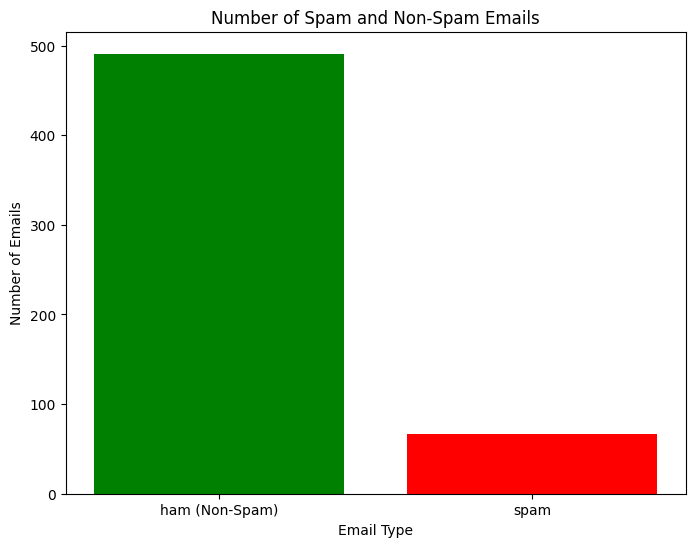

In [29]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()